# Data 

In [91]:
from sklearn.datasets import fetch_california_housing

In [92]:
data = fetch_california_housing(as_frame=True)

In [93]:
X, y = data['data'], data['target']
X. shape, y.shape

((20640, 8), (20640,))

In [94]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [95]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [96]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
y.describe() # * 100k$

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

<Axes: >

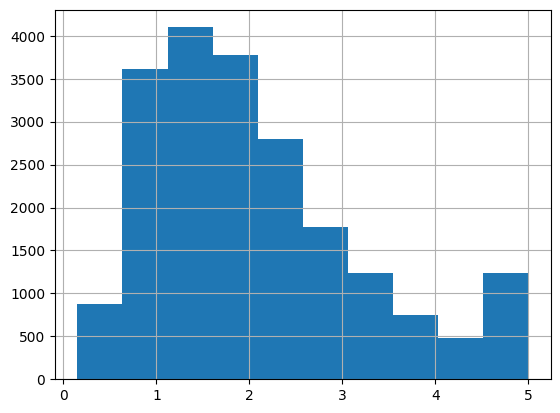

In [98]:
y.hist()

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
data=X.copy()
data['target'] = y

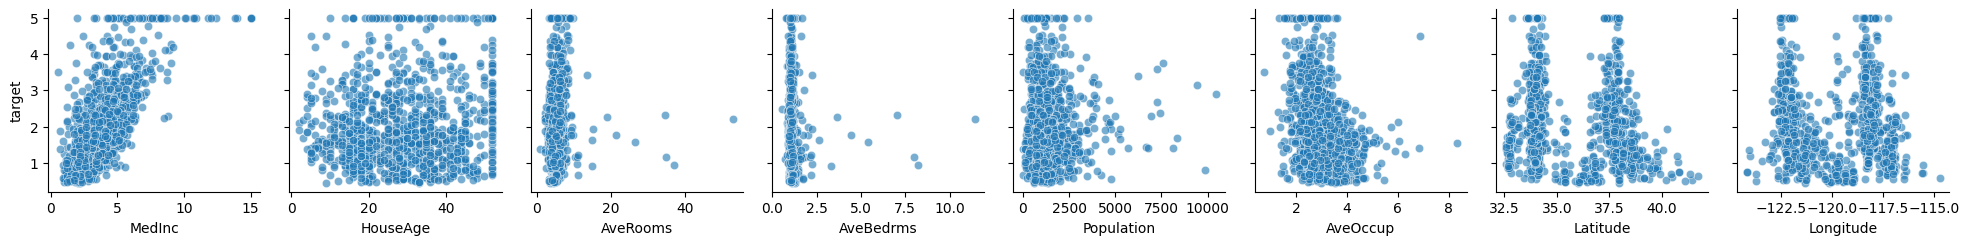

In [101]:
g = sns.PairGrid(data.sample(n=1000), 
                 x_vars=data.columns[:-1],
                 y_vars=['target'])

g.map(sns.scatterplot, alpha=0.6)
g.add_legend()
plt.show()

## Conclusion

| | |
|-----------|-------|
| Type | Regression |
| Target | Price |
| Data set size | 20k |
| Metrics | MAE, MSE, R^2 |
| Data dependencies | linear(MedInc), nonlinear(other) |

# Model

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8) 
# mid-size data set -> priority to train (standard proportion)

In [104]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [105]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 10, 50, step=5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 1.0]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestRegressor(**params) # nonlin, productive and reliable

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = root_mean_squared_error(y_test, y_pred) # big error -> big^2 loss
    
    return rmse

In [106]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

[I 2025-09-26 20:44:25,714] A new study created in memory with name: no-name-c920fc51-919c-4516-bf7c-93773697dc34
Best trial: 0. Best value: 0.508356:   2%|▏         | 1/50 [00:02<02:08,  2.61s/it]

[I 2025-09-26 20:44:28,336] Trial 0 finished with value: 0.5083555520194004 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 0 with value: 0.5083555520194004.


Best trial: 0. Best value: 0.508356:   4%|▍         | 2/50 [00:05<02:23,  2.99s/it]

[I 2025-09-26 20:44:31,592] Trial 1 finished with value: 0.5133983211862014 and parameters: {'n_estimators': 900, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5083555520194004.


Best trial: 0. Best value: 0.508356:   6%|▌         | 3/50 [00:07<01:42,  2.19s/it]

[I 2025-09-26 20:44:32,824] Trial 2 finished with value: 0.5238086883736554 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 13, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5083555520194004.


Best trial: 3. Best value: 0.507399:   8%|▊         | 4/50 [00:16<04:00,  5.23s/it]

[I 2025-09-26 20:44:42,722] Trial 3 finished with value: 0.5073987339894579 and parameters: {'n_estimators': 900, 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 3 with value: 0.5073987339894579.


Best trial: 3. Best value: 0.507399:  10%|█         | 5/50 [00:19<03:09,  4.21s/it]

[I 2025-09-26 20:44:45,131] Trial 4 finished with value: 0.5244691214586632 and parameters: {'n_estimators': 800, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.5073987339894579.


Best trial: 3. Best value: 0.507399:  12%|█▏        | 6/50 [00:19<02:07,  2.89s/it]

[I 2025-09-26 20:44:45,466] Trial 5 finished with value: 0.5208779250272594 and parameters: {'n_estimators': 100, 'max_depth': 50, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.5073987339894579.


Best trial: 6. Best value: 0.503783:  14%|█▍        | 7/50 [00:31<04:12,  5.88s/it]

[I 2025-09-26 20:44:57,502] Trial 6 finished with value: 0.503783008099106 and parameters: {'n_estimators': 900, 'max_depth': 35, 'min_samples_split': 16, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 6 with value: 0.503783008099106.


Best trial: 6. Best value: 0.503783:  16%|█▌        | 8/50 [00:32<02:54,  4.16s/it]

[I 2025-09-26 20:44:57,965] Trial 7 finished with value: 0.511205395870882 and parameters: {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 6 with value: 0.503783008099106.


Best trial: 6. Best value: 0.503783:  18%|█▊        | 9/50 [00:32<02:02,  2.98s/it]

[I 2025-09-26 20:44:58,352] Trial 8 finished with value: 0.5371684024423427 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 6 with value: 0.503783008099106.


Best trial: 9. Best value: 0.49785:  20%|██        | 10/50 [00:36<02:10,  3.27s/it]

[I 2025-09-26 20:45:02,258] Trial 9 finished with value: 0.49784983974047 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 9 with value: 0.49784983974047.


Best trial: 9. Best value: 0.49785:  22%|██▏       | 11/50 [00:42<02:44,  4.23s/it]

[I 2025-09-26 20:45:08,676] Trial 10 finished with value: 0.4988907952408311 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 9 with value: 0.49784983974047.


Best trial: 9. Best value: 0.49785:  24%|██▍       | 12/50 [00:49<03:04,  4.86s/it]

[I 2025-09-26 20:45:14,978] Trial 11 finished with value: 0.4988907952408311 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 9 with value: 0.49784983974047.


Best trial: 9. Best value: 0.49785:  26%|██▌       | 13/50 [00:52<02:44,  4.43s/it]

[I 2025-09-26 20:45:18,426] Trial 12 finished with value: 0.5313822081167501 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 9 with value: 0.49784983974047.


Best trial: 13. Best value: 0.496408:  28%|██▊       | 14/50 [01:01<03:22,  5.63s/it]

[I 2025-09-26 20:45:26,829] Trial 13 finished with value: 0.49640822164372844 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 13 with value: 0.49640822164372844.


Best trial: 13. Best value: 0.496408:  30%|███       | 15/50 [01:09<03:47,  6.50s/it]

[I 2025-09-26 20:45:35,353] Trial 14 finished with value: 0.49640822164372844 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 13 with value: 0.49640822164372844.


Best trial: 13. Best value: 0.496408:  32%|███▏      | 16/50 [01:17<03:50,  6.79s/it]

[I 2025-09-26 20:45:42,819] Trial 15 finished with value: 0.5059936053153289 and parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 13 with value: 0.49640822164372844.


Best trial: 16. Best value: 0.49018:  34%|███▍      | 17/50 [01:20<03:09,  5.75s/it] 

[I 2025-09-26 20:45:46,140] Trial 16 finished with value: 0.4901796861115299 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  36%|███▌      | 18/50 [01:23<02:41,  5.03s/it]

[I 2025-09-26 20:45:49,509] Trial 17 finished with value: 0.49386891467058763 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  38%|███▊      | 19/50 [01:28<02:31,  4.90s/it]

[I 2025-09-26 20:45:54,099] Trial 18 finished with value: 0.49468528035586123 and parameters: {'n_estimators': 1000, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  40%|████      | 20/50 [01:31<02:08,  4.27s/it]

[I 2025-09-26 20:45:56,915] Trial 19 finished with value: 0.4980157669011926 and parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  42%|████▏     | 21/50 [01:33<01:50,  3.80s/it]

[I 2025-09-26 20:45:59,603] Trial 20 finished with value: 0.5024637597088111 and parameters: {'n_estimators': 600, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  44%|████▍     | 22/50 [01:38<01:54,  4.07s/it]

[I 2025-09-26 20:46:04,320] Trial 21 finished with value: 0.4946852803558612 and parameters: {'n_estimators': 1000, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  46%|████▌     | 23/50 [01:42<01:49,  4.05s/it]

[I 2025-09-26 20:46:08,317] Trial 22 finished with value: 0.4914625803967529 and parameters: {'n_estimators': 800, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  48%|████▊     | 24/50 [01:46<01:43,  3.99s/it]

[I 2025-09-26 20:46:12,155] Trial 23 finished with value: 0.49285394144897 and parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  50%|█████     | 25/50 [01:50<01:39,  3.97s/it]

[I 2025-09-26 20:46:16,086] Trial 24 finished with value: 0.49349638293880455 and parameters: {'n_estimators': 800, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  52%|█████▏    | 26/50 [01:54<01:34,  3.93s/it]

[I 2025-09-26 20:46:19,932] Trial 25 finished with value: 0.49579618899131905 and parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 16. Best value: 0.49018:  54%|█████▍    | 27/50 [01:58<01:31,  3.97s/it]

[I 2025-09-26 20:46:23,993] Trial 26 finished with value: 0.49087500217038965 and parameters: {'n_estimators': 800, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.4901796861115299.


Best trial: 27. Best value: 0.484022:  56%|█████▌    | 28/50 [02:01<01:22,  3.76s/it]

[I 2025-09-26 20:46:27,266] Trial 27 finished with value: 0.48402165679333986 and parameters: {'n_estimators': 600, 'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 27 with value: 0.48402165679333986.


Best trial: 28. Best value: 0.484018:  58%|█████▊    | 29/50 [02:04<01:16,  3.66s/it]

[I 2025-09-26 20:46:30,704] Trial 28 finished with value: 0.48401794773612766 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.48401794773612766.


Best trial: 28. Best value: 0.484018:  60%|██████    | 30/50 [02:08<01:11,  3.59s/it]

[I 2025-09-26 20:46:34,112] Trial 29 finished with value: 0.48401794773612766 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.48401794773612766.


Best trial: 30. Best value: 0.482353:  62%|██████▏   | 31/50 [02:10<01:00,  3.16s/it]

[I 2025-09-26 20:46:36,284] Trial 30 finished with value: 0.4823527503348643 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 30 with value: 0.4823527503348643.


Best trial: 31. Best value: 0.482353:  64%|██████▍   | 32/50 [02:12<00:51,  2.86s/it]

[I 2025-09-26 20:46:38,452] Trial 31 finished with value: 0.48235275033486424 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  66%|██████▌   | 33/50 [02:14<00:43,  2.53s/it]

[I 2025-09-26 20:46:40,205] Trial 32 finished with value: 0.48319194868670945 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  68%|██████▊   | 34/50 [02:15<00:35,  2.22s/it]

[I 2025-09-26 20:46:41,715] Trial 33 finished with value: 0.48789844070178223 and parameters: {'n_estimators': 300, 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  70%|███████   | 35/50 [02:17<00:29,  1.98s/it]

[I 2025-09-26 20:46:43,110] Trial 34 finished with value: 0.4887817548834703 and parameters: {'n_estimators': 300, 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  72%|███████▏  | 36/50 [02:19<00:28,  2.02s/it]

[I 2025-09-26 20:46:45,226] Trial 35 finished with value: 0.4852811272114491 and parameters: {'n_estimators': 400, 'max_depth': 45, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  74%|███████▍  | 37/50 [02:20<00:21,  1.64s/it]

[I 2025-09-26 20:46:45,980] Trial 36 finished with value: 0.4967457581016158 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  76%|███████▌  | 38/50 [02:22<00:22,  1.85s/it]

[I 2025-09-26 20:46:48,315] Trial 37 finished with value: 0.48235275033486424 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  78%|███████▊  | 39/50 [02:24<00:21,  1.95s/it]

[I 2025-09-26 20:46:50,496] Trial 38 finished with value: 0.4847724892728449 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  80%|████████  | 40/50 [02:25<00:15,  1.60s/it]

[I 2025-09-26 20:46:51,272] Trial 39 finished with value: 0.4967457581016158 and parameters: {'n_estimators': 200, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  82%|████████▏ | 41/50 [02:27<00:14,  1.57s/it]

[I 2025-09-26 20:46:52,786] Trial 40 finished with value: 0.4877643249614802 and parameters: {'n_estimators': 300, 'max_depth': 45, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 31. Best value: 0.482353:  84%|████████▍ | 42/50 [02:29<00:15,  1.96s/it]

[I 2025-09-26 20:46:55,646] Trial 41 finished with value: 0.48238767359199897 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.48235275033486424.


Best trial: 42. Best value: 0.480847:  86%|████████▌ | 43/50 [02:33<00:16,  2.35s/it]

[I 2025-09-26 20:46:58,921] Trial 42 finished with value: 0.4808469442259876 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 42 with value: 0.4808469442259876.


Best trial: 43. Best value: 0.480806:  88%|████████▊ | 44/50 [02:36<00:15,  2.54s/it]

[I 2025-09-26 20:47:01,912] Trial 43 finished with value: 0.48080577468098135 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 43 with value: 0.48080577468098135.


Best trial: 43. Best value: 0.480806:  90%|█████████ | 45/50 [02:39<00:13,  2.79s/it]

[I 2025-09-26 20:47:05,266] Trial 44 finished with value: 0.48203533401500426 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 43 with value: 0.48080577468098135.


Best trial: 43. Best value: 0.480806:  92%|█████████▏| 46/50 [02:42<00:11,  2.95s/it]

[I 2025-09-26 20:47:08,597] Trial 45 finished with value: 0.48203533401500426 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 43 with value: 0.48080577468098135.


Best trial: 43. Best value: 0.480806:  94%|█████████▍| 47/50 [02:45<00:08,  2.91s/it]

[I 2025-09-26 20:47:11,399] Trial 46 finished with value: 0.48575962568848174 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.48080577468098135.


Best trial: 43. Best value: 0.480806:  96%|█████████▌| 48/50 [02:49<00:06,  3.05s/it]

[I 2025-09-26 20:47:14,769] Trial 47 finished with value: 0.48203438637896584 and parameters: {'n_estimators': 500, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 43 with value: 0.48080577468098135.


Best trial: 43. Best value: 0.480806:  98%|█████████▊| 49/50 [02:52<00:03,  3.20s/it]

[I 2025-09-26 20:47:18,345] Trial 48 finished with value: 0.48203438637896584 and parameters: {'n_estimators': 500, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 43 with value: 0.48080577468098135.


Best trial: 43. Best value: 0.480806: 100%|██████████| 50/50 [02:56<00:00,  3.52s/it]

[I 2025-09-26 20:47:21,738] Trial 49 finished with value: 0.48203438637896584 and parameters: {'n_estimators': 500, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 43 with value: 0.48080577468098135.


In [107]:
best_params = study.best_params
best_rmse = study.best_value

In [108]:
print(f"Best RMSE: {best_rmse:.4f}")
print(f"Best parameters: {best_params}")

Best RMSE: 0.4808
Best parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}


# Tests

In [109]:
final_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)
y_pred_test = final_model.predict(X_test)

In [110]:
final_mae = mean_absolute_error(y_test, y_pred_test) # absolute error
final_r2 = r2_score(y_test, y_pred_test) # no comments

print("Final metrics:")
print(f"MAE: {final_mae:.4f}")
print(f"R^2: {final_r2:.4f}")

Final metrics:
MAE: 0.3184
R^2: 0.8372


# Plots

In [111]:
residuals = y_test - y_pred_test

<>:10: SyntaxWarning: invalid escape sequence '\h'
<>:10: SyntaxWarning: invalid escape sequence '\h'
/var/folders/s6/j_4p__nd5kg5dvjxbj6y3ywh0000gn/T/ipykernel_33621/296174815.py:10: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Предсказанная Стоимость Дома ($\hat{y}_{test}$)', fontsize=12)


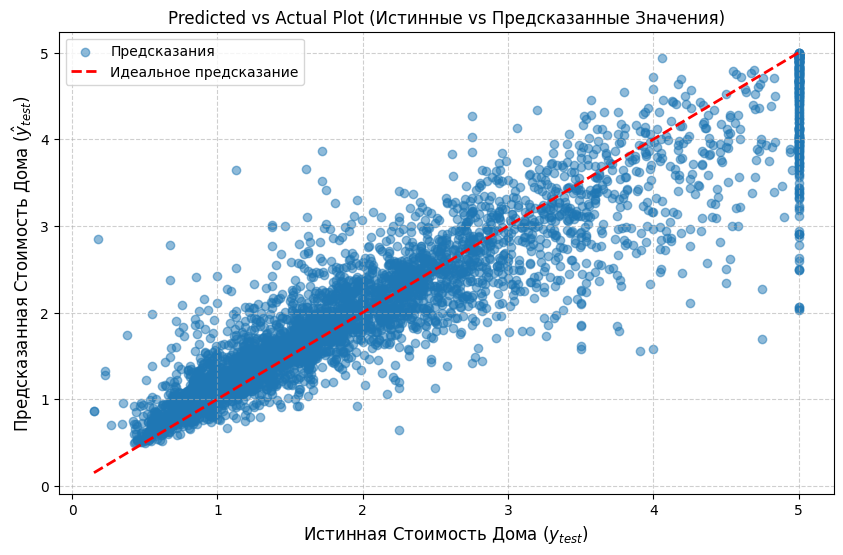


Интерпретация Графика 1:
Если точки сгруппированы плотно вокруг красной линии, модель точна. Если точки образуют 'облако' или отклоняются от линии, это указывает на систематические ошибки.


In [112]:
# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
# Точки (истинное значение, предсказанное значение)
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Предсказания')
# Идеальная линия предсказания (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальное предсказание')

plt.title('Predicted vs Actual Plot (Истинные vs Предсказанные Значения)')
plt.xlabel('Истинная Стоимость Дома ($y_{test}$)', fontsize=12)
plt.ylabel('Предсказанная Стоимость Дома ($\hat{y}_{test}$)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nИнтерпретация Графика 1:")
print("Если точки сгруппированы плотно вокруг красной линии, модель точна. Если точки образуют 'облако' или отклоняются от линии, это указывает на систематические ошибки.")

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:10: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:10: SyntaxWarning: invalid escape sequence '\h'
/var/folders/s6/j_4p__nd5kg5dvjxbj6y3ywh0000gn/T/ipykernel_33621/3461956083.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Предсказанная Стоимость Дома ($\hat{y}_{test}$)', fontsize=12)
/var/folders/s6/j_4p__nd5kg5dvjxbj6y3ywh0000gn/T/ipykernel_33621/3461956083.py:10: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Остатки ($y_{test} - \hat{y}_{test}$)', fontsize=12)


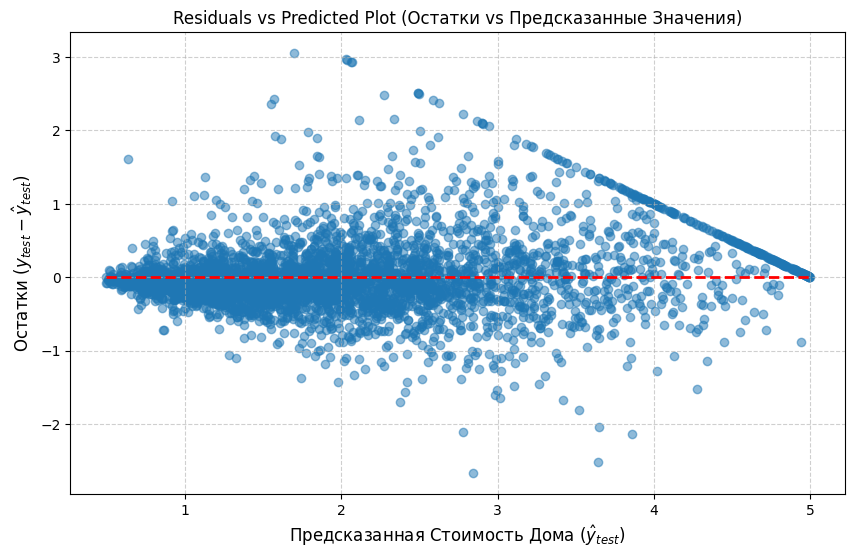


Интерпретация Графика 2:
1. Случайное распределение вокруг 0: Остатки должны выглядеть как 'горизонтальное облако' вокруг красной линии 0. Это свидетельствует о том, что модель адекватно захватила зависимости.
2. 'Воронкообразная' или 'конусообразная' форма: Указывает на гетероскедастичность (дисперсия ошибок не постоянна), что может говорить о необходимости логарифмического преобразования целевой переменной или использования других моделей.
3. Систематические паттерны (например, кривая): Указывает на то, что модель не захватила какую-то нелинейную зависимость в данных.


In [113]:
#Residuals vs Predicted Plot
plt.figure(figsize=(10, 6))
# Точки (Предсказанное значение, Остаток)
plt.scatter(y_pred_test, residuals, alpha=0.5)
# Горизонтальная линия 0
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), color='red', linestyle='--', lw=2)

plt.title('Residuals vs Predicted Plot (Остатки vs Предсказанные Значения)')
plt.xlabel('Предсказанная Стоимость Дома ($\hat{y}_{test}$)', fontsize=12)
plt.ylabel('Остатки ($y_{test} - \hat{y}_{test}$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nИнтерпретация Графика 2:")
print("1. Случайное распределение вокруг 0: Остатки должны выглядеть как 'горизонтальное облако' вокруг красной линии 0. Это свидетельствует о том, что модель адекватно захватила зависимости.")
print("2. 'Воронкообразная' или 'конусообразная' форма: Указывает на гетероскедастичность (дисперсия ошибок не постоянна), что может говорить о необходимости логарифмического преобразования целевой переменной или использования других моделей.")
print("3. Систематические паттерны (например, кривая): Указывает на то, что модель не захватила какую-то нелинейную зависимость в данных.")